## import Basic Libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
plt.style.use("fivethirtyeight")

## Load Data

In [4]:

df_raw = pd.read_csv('application_data.csv')
df = df_raw.copy()

In [10]:
description = pd.read_csv('columns_description.csv' , index_col=0)
description

,Table,Row,Description,Special
1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_data,CODE_GENDER,Gender of the client,NaN
7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [11]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.shape

(307511, 122)

In [13]:
# Function to describe a columns name
def description_func(row=None):
    descr = description[description['Row']==row]['Description']
    return print(descr.str.cat())

In [14]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Missing Values

In [15]:
# Number of Missing values in %
def find_missing_values(df):
    df_nan = ((df.isnull().sum()/len(df))*100).sort_values()
    df_miss = df_nan[df_nan > 0]
    return df_miss

In [16]:
# Plot Missing values
def plot_missing_values(df_miss):
    df_miss.plot(kind='bar', figsize=(17,6))
    plt.title('Missing Values by Column \n', size=22)
    plt.xlabel('column Name', size=17)
    plt.ylabel('Percentage of Missing Values\n', size=17)
    plt.show()
    return None

In [17]:
df_miss = find_missing_values(df)

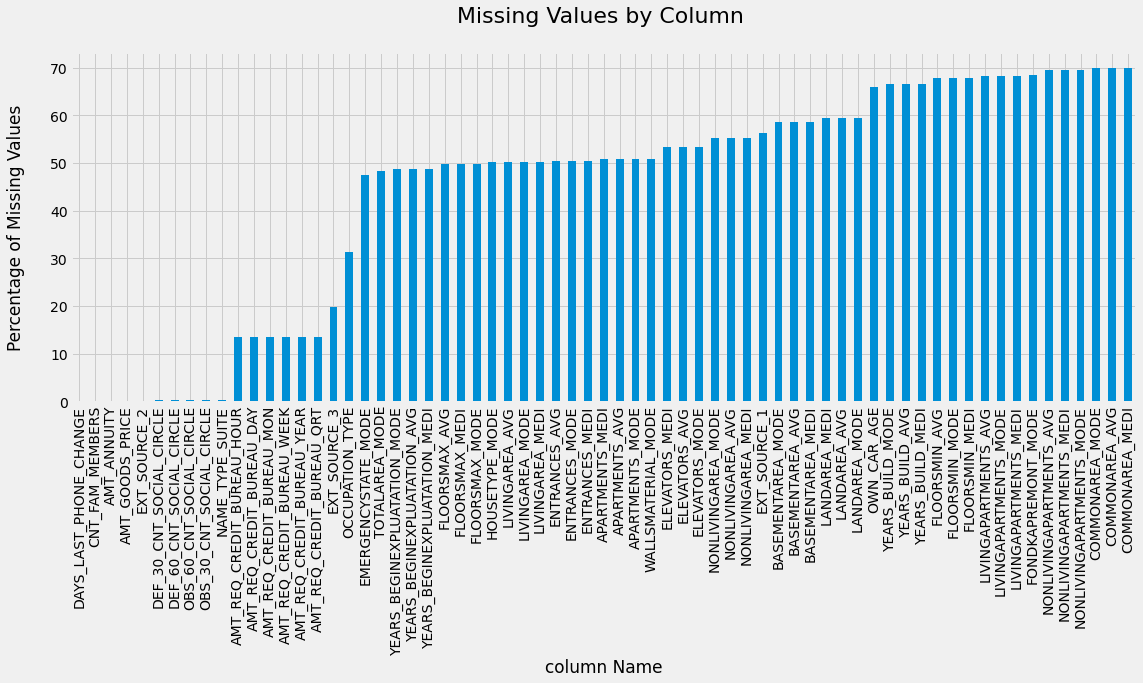

In [18]:
plot_missing_values(df_miss)

<AxesSubplot:>

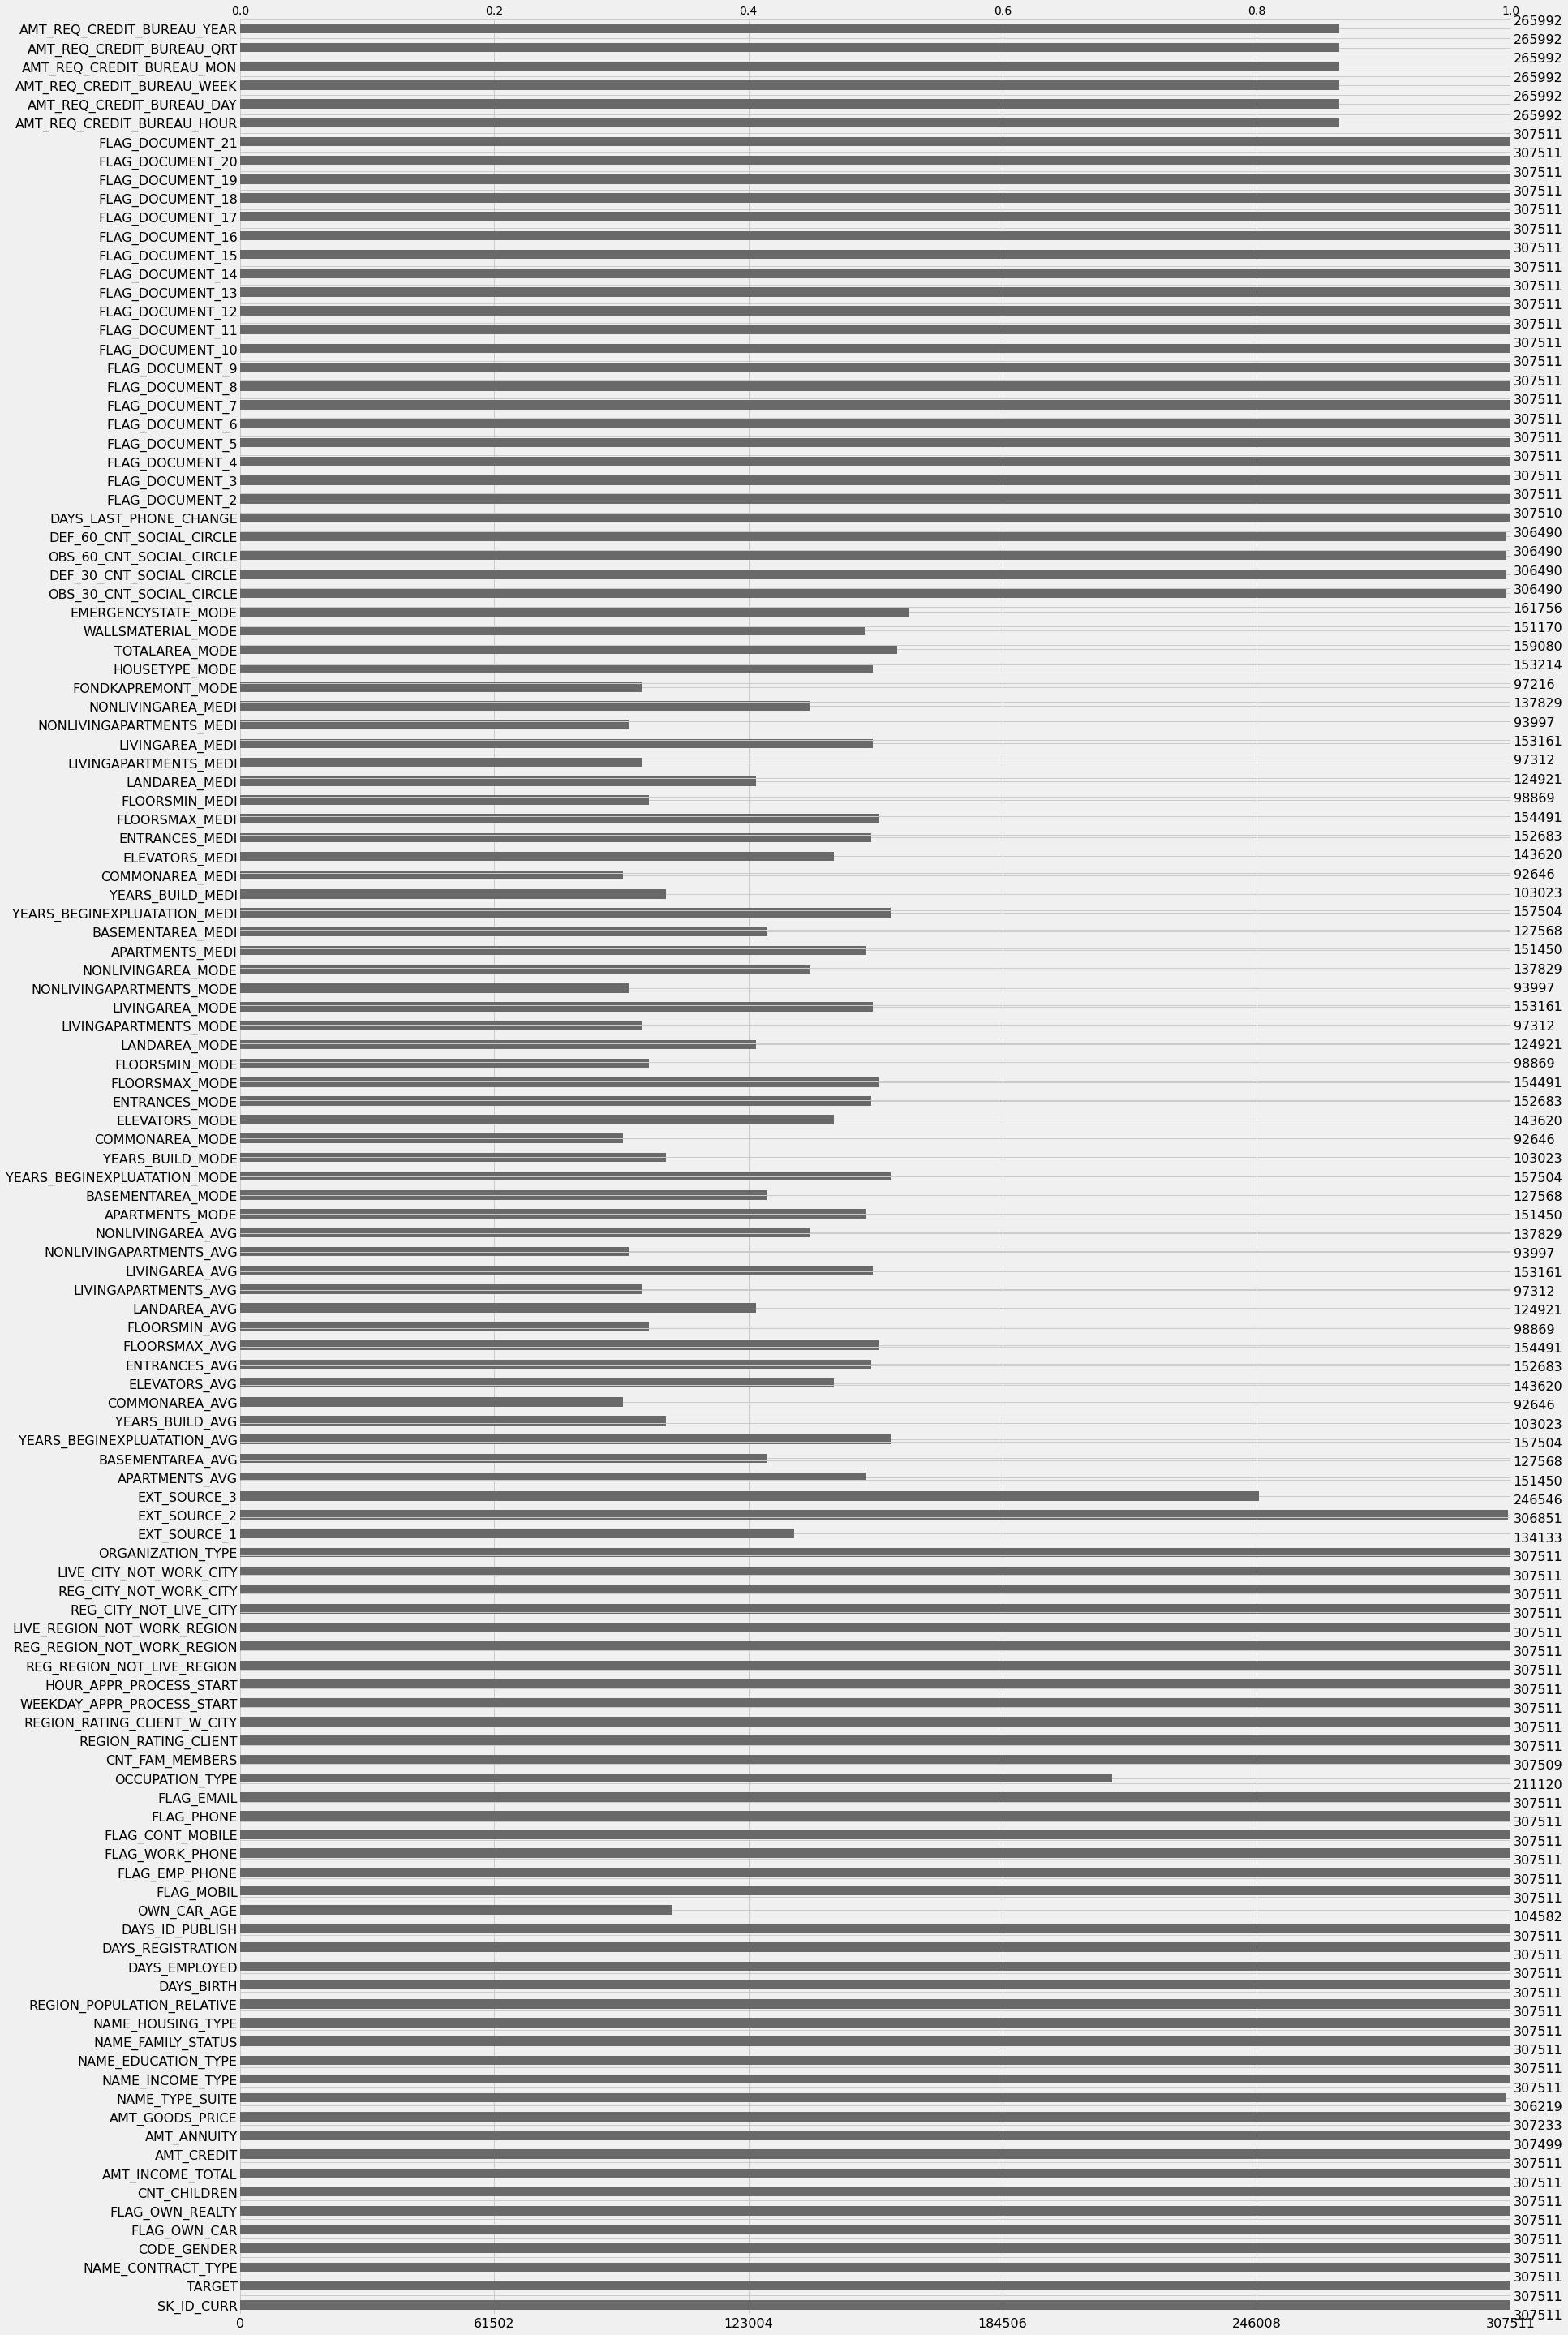

In [19]:
msno.bar(df, label_rotation=90)

In [20]:
def plot_null_values(df):
    df_null = pd.DataFrame(df.isnull().sum()/len(df)*100).reset_index()
    df_null.columns = ['Coluns Name', 'Null Values Percentage']

    fig = plt.figure(figsize=(22,7))
    ax = sns.pointplot(x='Coluns Name', y='Null Values Percentage', data=df_null, color='blue')
    plt.xticks(rotation=90, size=7)
    ax.axhline(50, ls='--', color='red')
    plt.title("Percenatage of Missing Values in df\n",size=22)
    plt.xlabel("Columns Name\n", size=17)
    plt.ylabel("Percenatge of Missing Values\n", size=17)
    plt.show()
    return None

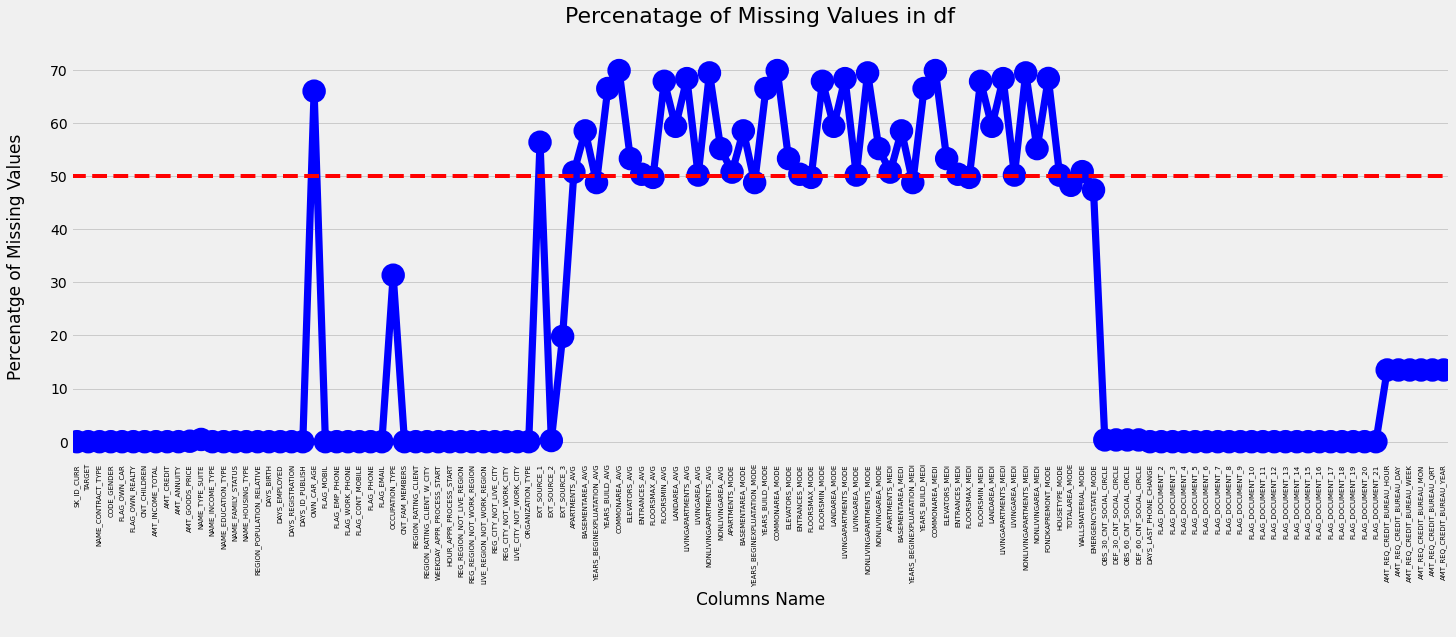

In [21]:
plot_null_values(df)

In [22]:
# Column with Missing values greather than 50%

df_null_50 = pd.DataFrame(df_miss[df_miss>50]).reset_index()
df_null_50.columns=['Columns Name','Percentage of Missing Values']
df_null_50.style.background_gradient(cmap='viridis')

,Columns Name,Percentage of Missing Values
0,HOUSETYPE_MODE,50.176091
1,LIVINGAREA_AVG,50.193326
2,LIVINGAREA_MODE,50.193326
3,LIVINGAREA_MEDI,50.193326
4,ENTRANCES_AVG,50.348768
5,ENTRANCES_MODE,50.348768
6,ENTRANCES_MEDI,50.348768
7,APARTMENTS_MEDI,50.749729
8,APARTMENTS_AVG,50.749729
9,APARTMENTS_MODE,50.749729


In [23]:
# Drop columnof Missing values more than 50%

#df_null_50.set_index('Columns Name').index

df_50_drop = ['HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MODE', 'COMMONAREA_AVG',
       'COMMONAREA_MEDI']
df = df.drop(df_50_drop, axis=1)

In [24]:
df.corr().style.background_gradient(cmap='viridis')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002342,0.000222,0.001551,0.004851,0.001890,0.004386,0.001366,0.004588,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.160472,-0.178919,-0.009728,-0.044003,-0.009036,-0.043226,-0.009993,-0.043768,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.018015,-0.042710,0.006902,-0.009705,0.006199,-0.009550,0.006401,-0.009447,-0.008037,0.015593,-0.001262,0.015232,-0.001861,-0.005865,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,0.008506,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016342,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.060925,-0.030229,0.005658,0.060171,0.005284,0.057675,0.005639,0.059682,0.041985,-0.013099,-0.013244,-0.013015,-0.013135,-0.018585,-0.001000,-0.016751,0.000529,0.001507,-0.045878,0.003825,0.072451,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838

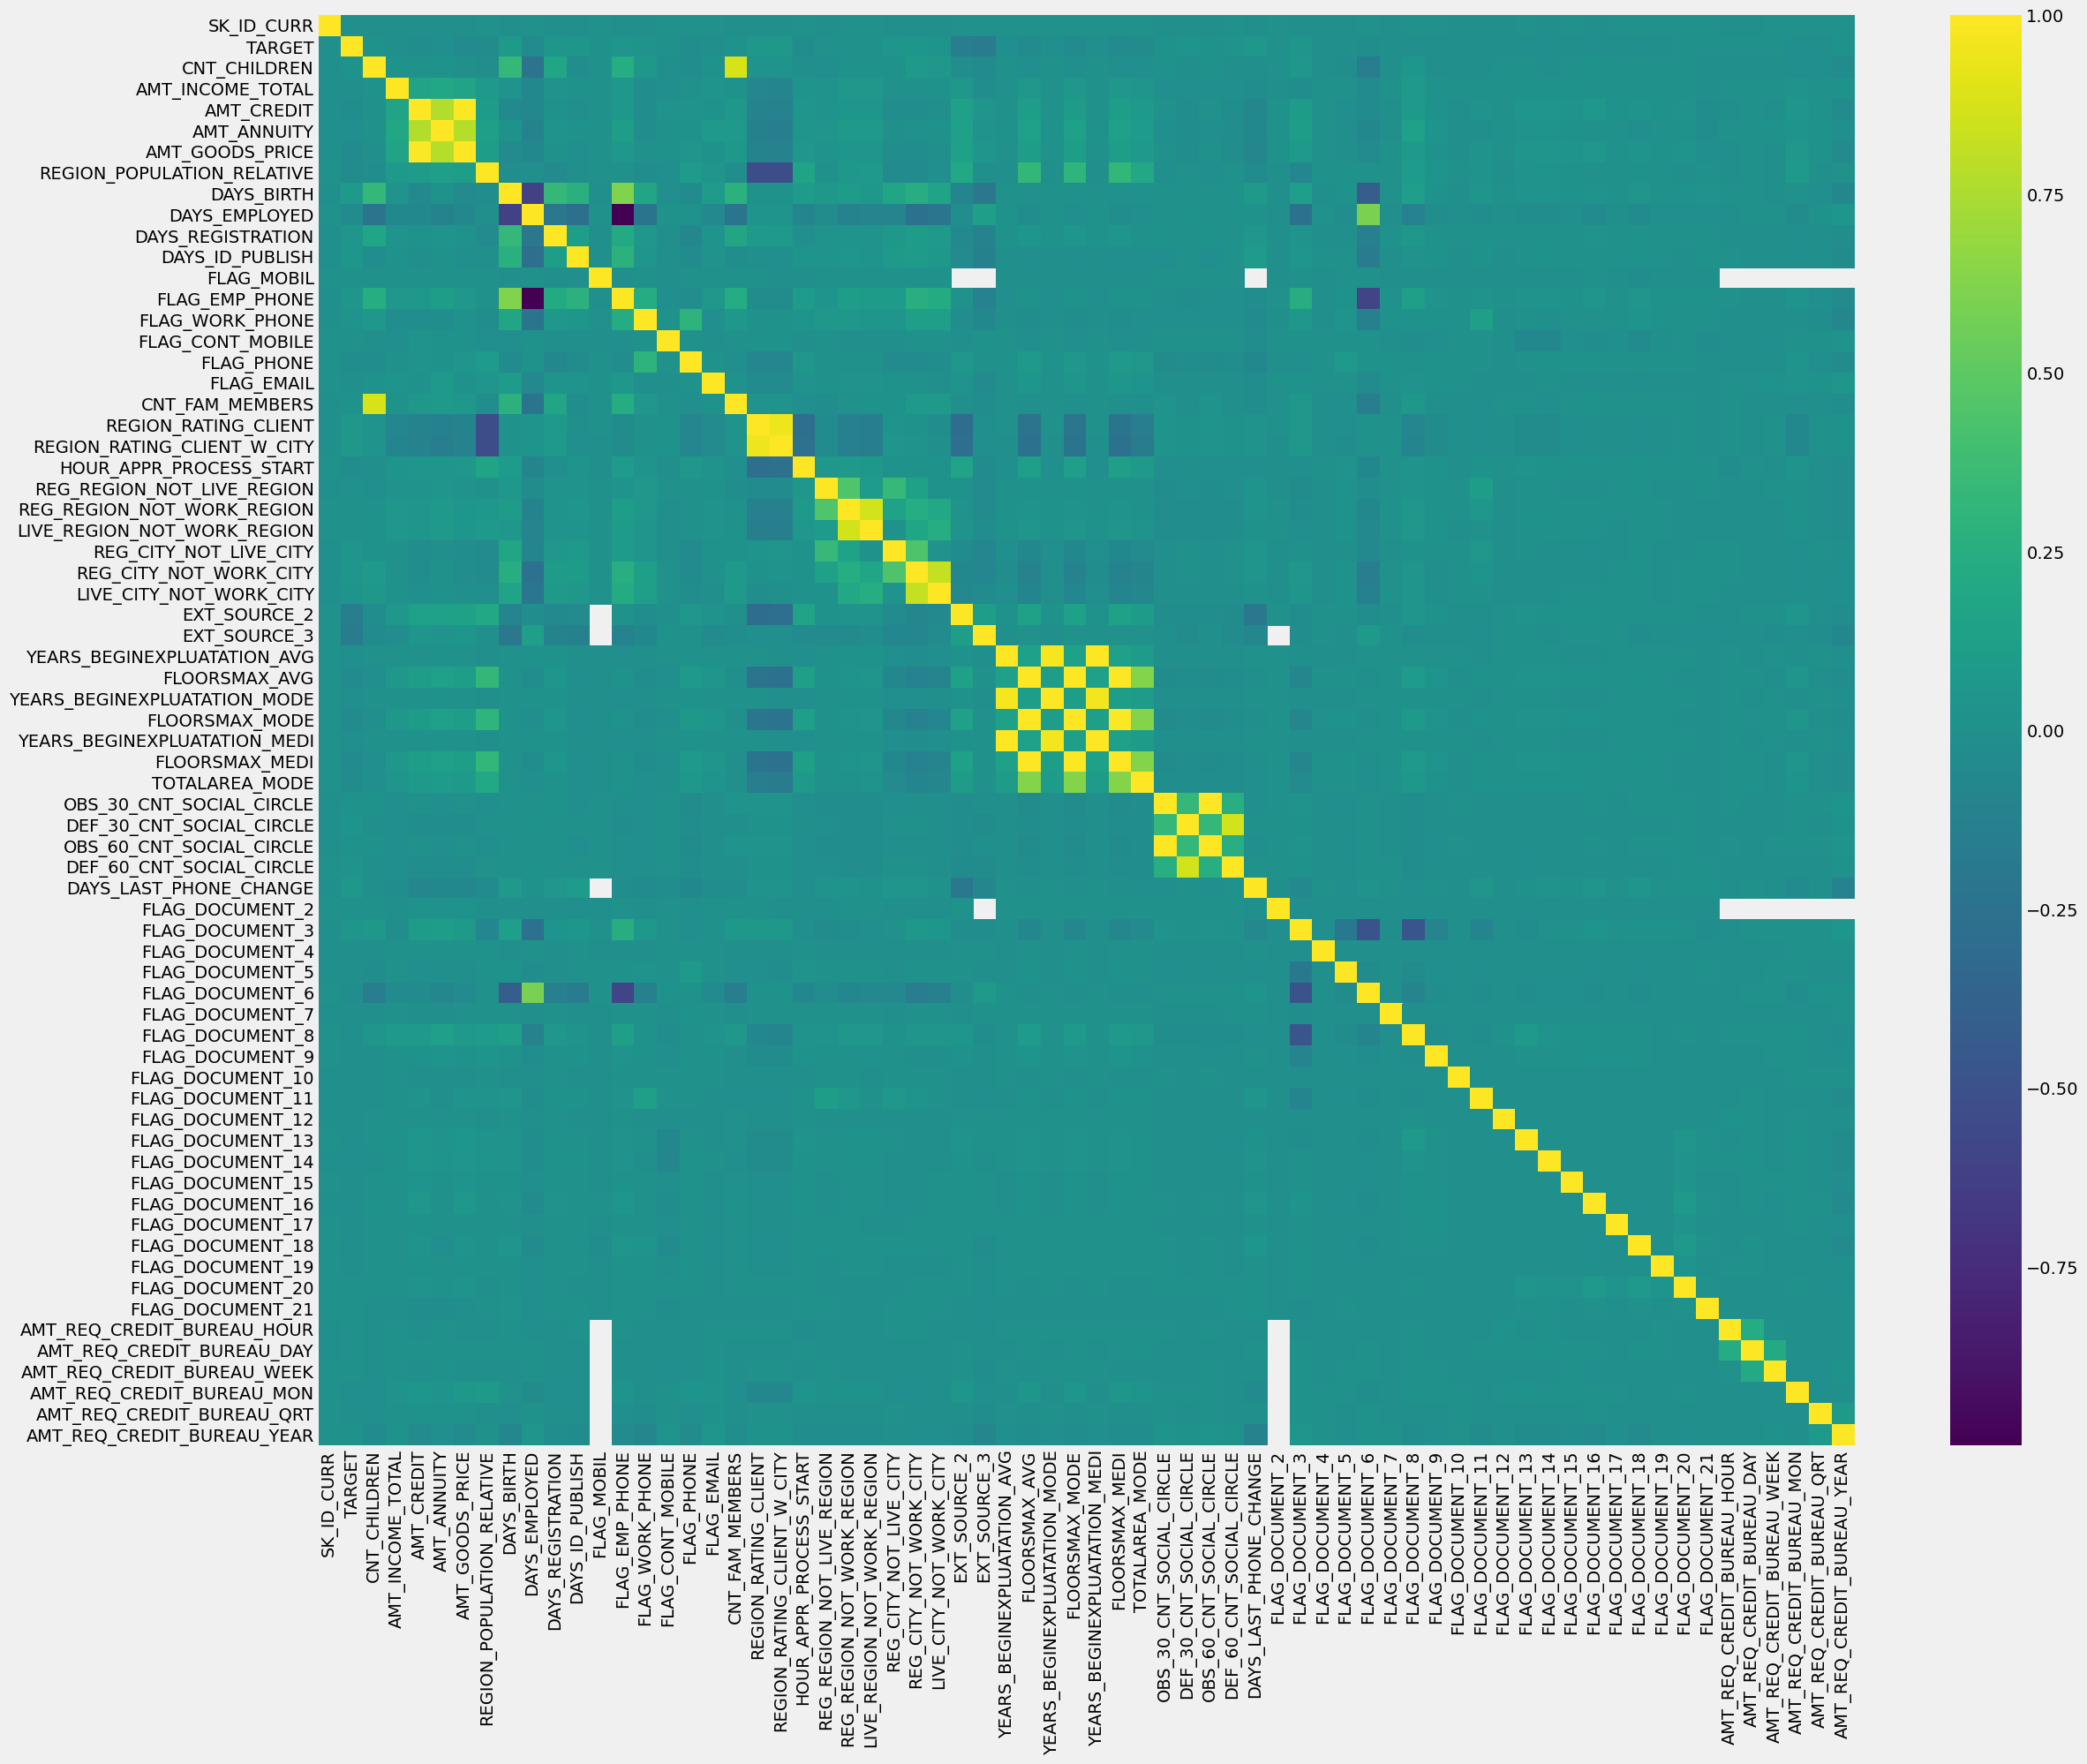

In [25]:
plt.figure(figsize=(25,20), dpi=100)
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

### Categorial and missing values

In [26]:
num_cols = [col for col in df.columns if df[col].dtypes!='object']
cat_cols = [col for col in df.columns if df[col].dtypes=='object']

In [27]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [28]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

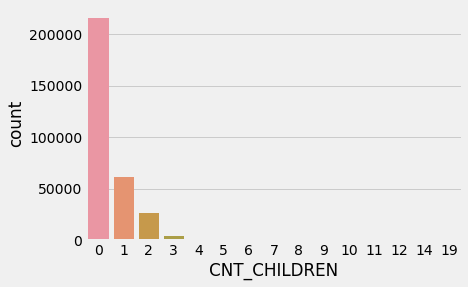

In [29]:
sns.countplot(x=df['CNT_CHILDREN'])

In [30]:
df_AMT = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']


In [31]:
df_miss = find_missing_values(df)

In [32]:
df_miss

DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
EXT_SOURCE_2                     0.214626
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
EXT_SOURCE_3                    19.825307
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_MODE                  49

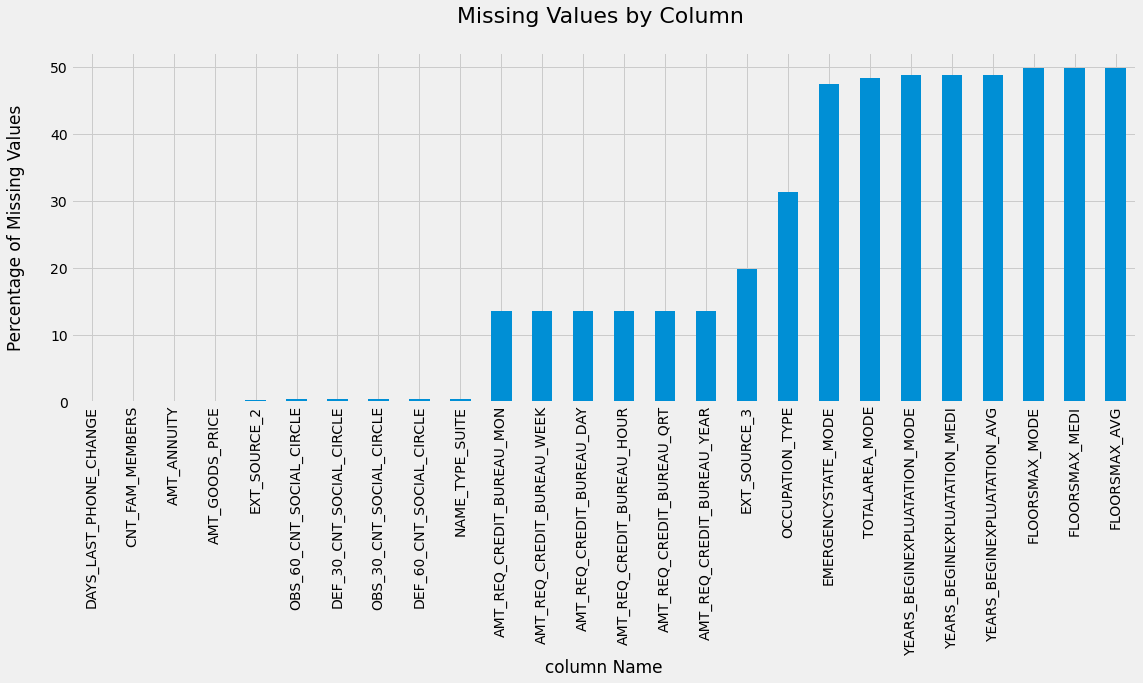

In [33]:
plot_missing_values(df_miss)

In [34]:
abs(df['DAYS_LAST_PHONE_CHANGE'])

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [35]:
df[df['DAYS_LAST_PHONE_CHANGE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [37]:
df[df['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
from sklearn.impute import SimpleImputer

In [39]:
def SimpleImputer_funct(col,strategy):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]
    return df[col].isnull().sum()

In [40]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [41]:
df[['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']].corr()

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.109167,1.000000,-0.178919
TARGET,-0.160472,-0.178919,1.000000


<AxesSubplot:>

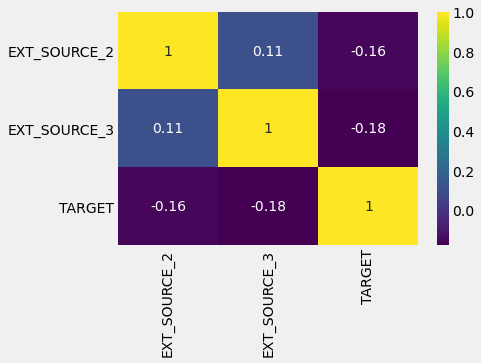

In [42]:
sns.heatmap(df[['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']].corr(),cmap='viridis',annot=True)

# Very low correlation between column 'EXT_SOURCE_2','EXT_SOURCE_3' and Target, so we can drop thse columns

In [43]:
df = df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)

In [44]:
# Correlation between AMT and Taget

col_FLAG = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

In [45]:
df_AMT = df[col_FLAG + ['TARGET']]

<AxesSubplot:>

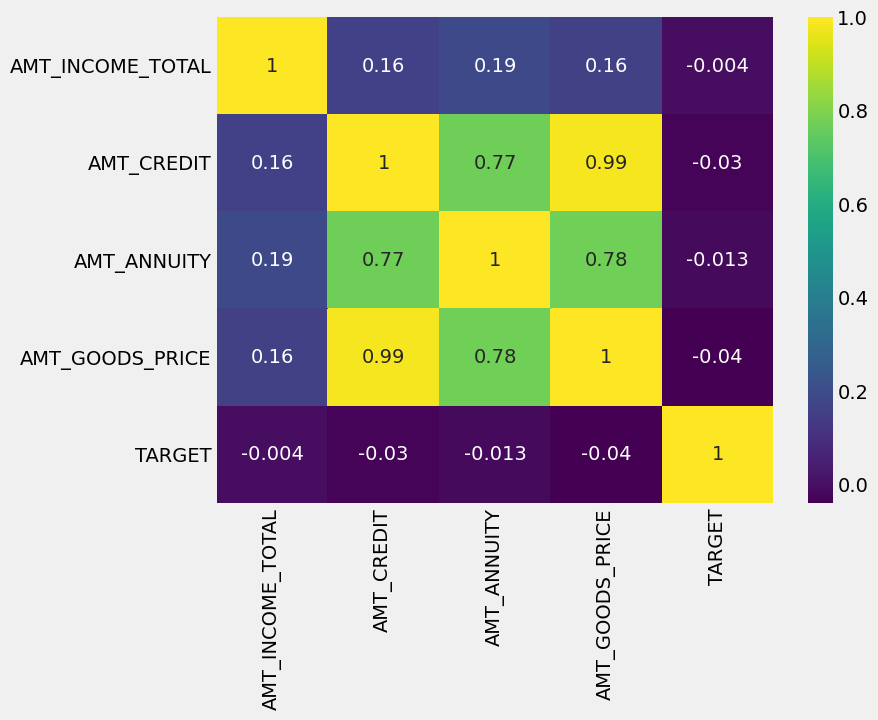

In [46]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df[col_FLAG + ['TARGET']].corr(), cmap='viridis', annot=True)

In [47]:
# Correlation between FLAG_DOCUMENT and Taget

col_FLAG = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']

In [48]:
df_FLAG = df[col_FLAG + ['TARGET']]

In [49]:
df_FLAG.loc[:,'TARGET'] = df_FLAG['TARGET'].replace({1:"Defaulter", 0: "Repayer"})

C:\Users\tsi_n\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [50]:
df_FLAG

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Defaulter
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307508,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Defaulter


In [51]:
import itertools

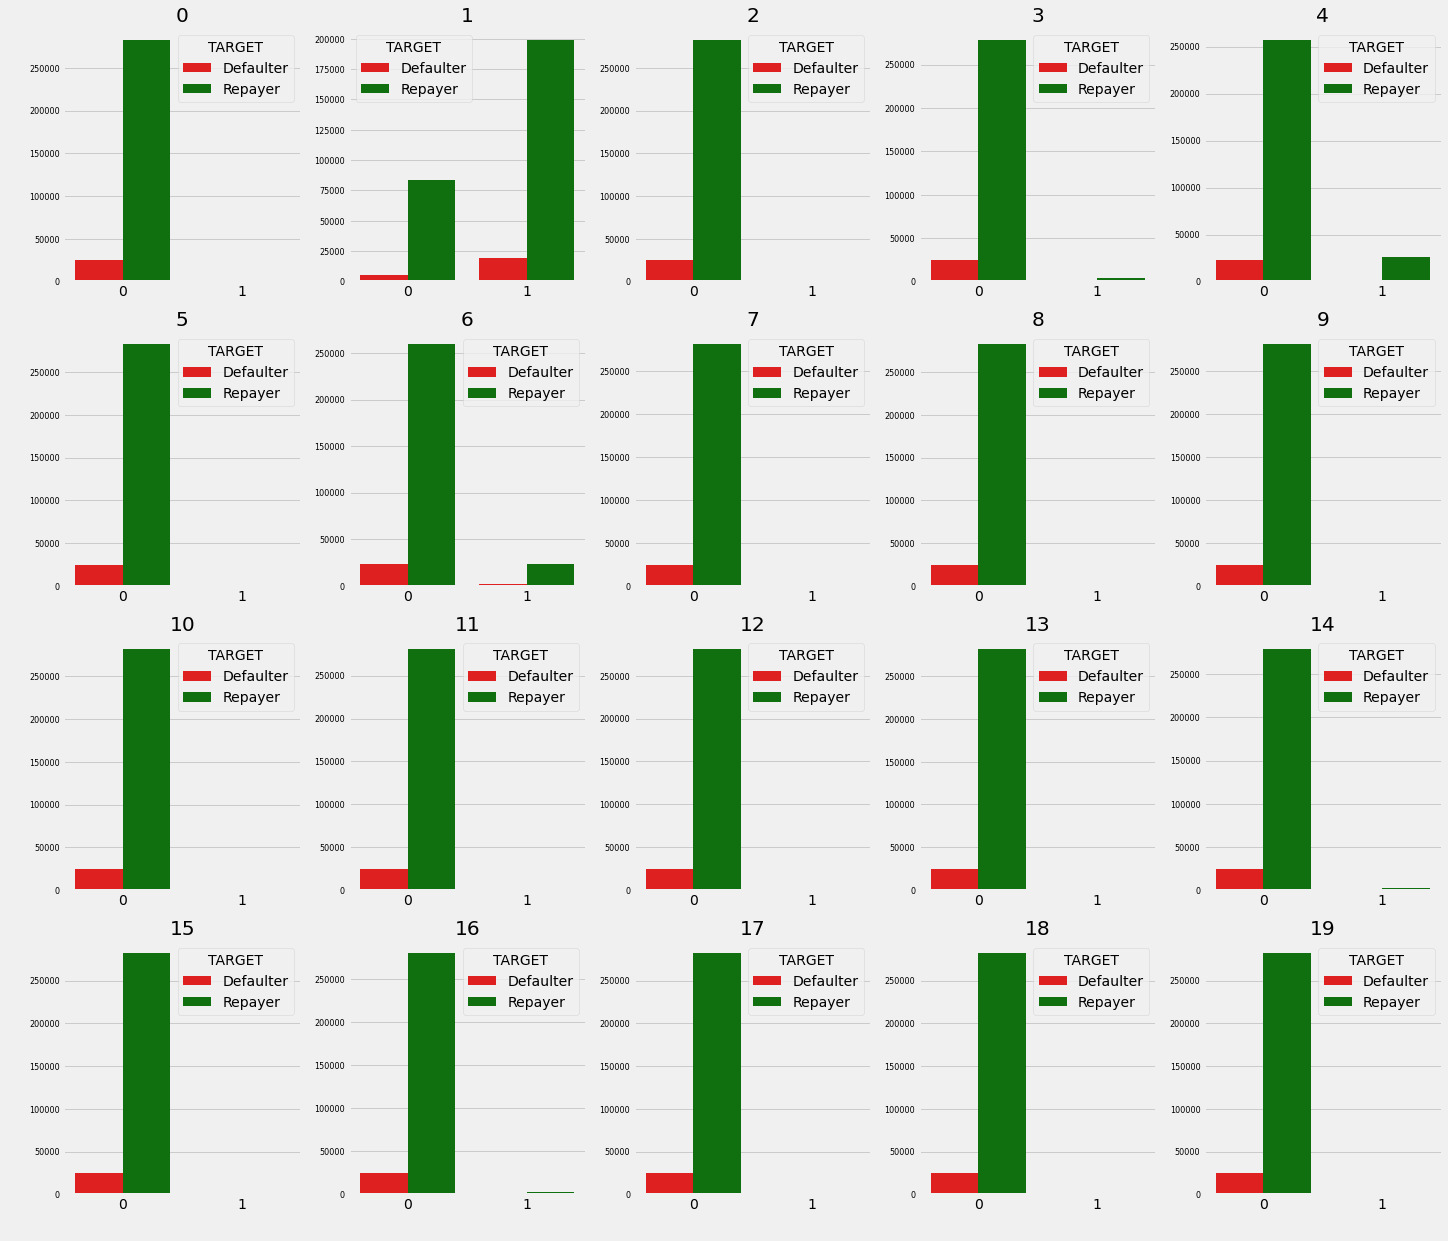

In [52]:
fig = plt.figure(figsize=(22,20))
for cols ,index in itertools.zip_longest(col_FLAG, range(len(col_FLAG))):
    plt.subplot(4 , 5, index+1)
    ax = sns.countplot(x=df_FLAG[cols], hue=df_FLAG["TARGET"], palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.title(index)

In [53]:
# only, the FLAG_DOCUMENT_3 column will be kept, because the rest is useless for the continuation of the analysis
col_FLAG.remove('FLAG_DOCUMENT_3')

In [54]:
# Drop the rest a of columns of FLAG_DOCUMENT_X

df = df.drop(col_FLAG, axis=1)

In [55]:
# df[col_Name + ['TARGET']]

In [56]:
num_cols = [col for col in df.columns if df[col].dtypes!='object']
cat_cols = [col for col in df.columns if df[col].dtypes=='object']

In [57]:
df[num_cols].columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG

In [58]:
# correlation between mobile phone, work phone etc, email, Family members and Region rating
col_contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

<AxesSubplot:>

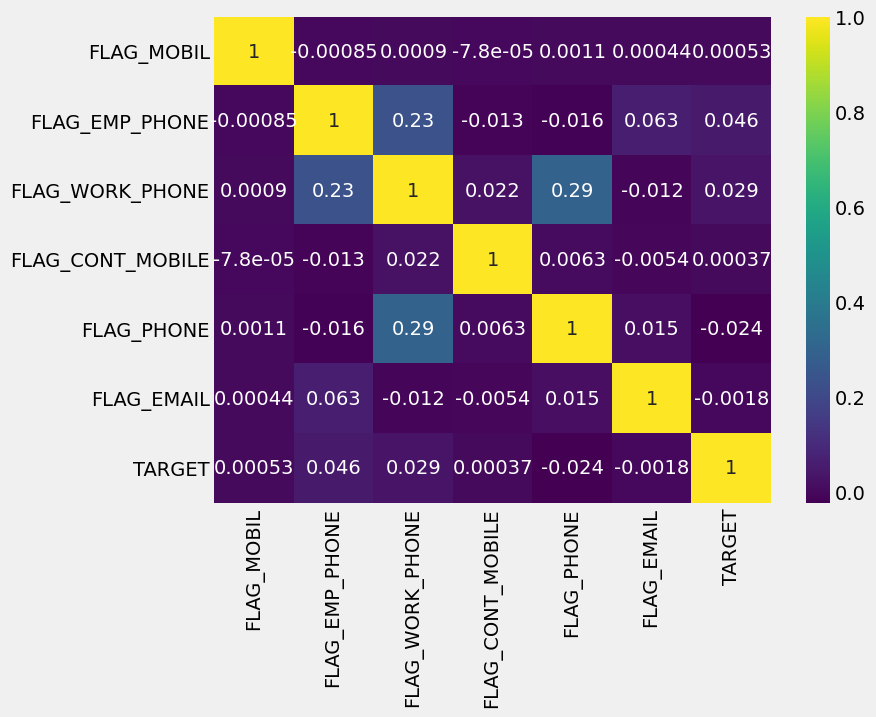

In [59]:
fig = plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df[col_contact + ['TARGET']].corr(), cmap='viridis', annot=True)

In [60]:
# There ist no relevant correlations betwenn these Features and the Target variable, drop all these columns

df = df.drop(col_contact, axis=1)

In [61]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
  

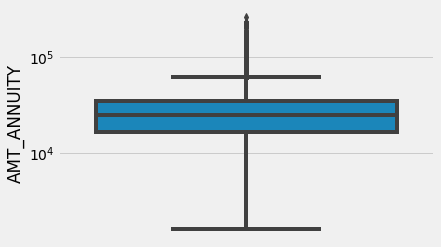

In [63]:
# box plotting the values of AMT_ANNUITY
sns.boxplot(y=df['AMT_ANNUITY'])
plt.yscale('log')
plt.show()

In [64]:
print(f"Mean: {round(df['AMT_ANNUITY'].mean(),2)}",'\n')
print(f"Median: {round(df['AMT_ANNUITY'].median(),2)}",'\n')
print(df['AMT_ANNUITY'].describe())

Mean: 27108.57 

Median: 24903.0 

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [65]:
(df['AMT_ANNUITY']).isnull().sum()

12

## Feature Engineering

In [66]:
# Convert Negative into positiv Days

col_date = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for col in col_date:
    df[col] = abs(df[col])

In [67]:
df[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head(2)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291


In [68]:
# 10 biggest AMT_INCOME_TOTAL

df['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(10)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
103006      4500000.0
204564      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
# Creating a new categorical variable from a continue variable 'AMT_INCOME_TOTAL'

ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k'
         ,'700k-800k','800k-900k','900k-1M', '1M Above']
bins = range(0,12,1)

df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL']/100000, bins=bins, labels=ranges)

In [70]:
round(df['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100,2)

100K-200K    50.73
200k-300k    21.21
0-100K       20.73
300k-400k     4.78
400k-500k     1.74
500k-600k     0.36
600k-700k     0.28
800k-900k     0.10
700k-800k     0.05
900k-1M       0.01
1M Above      0.01
Name: AMT_INCOME_TOTAL_RANGE, dtype: float64

In [71]:
# Drop the columns 'AMT_INCOME_TOTAL'
df = df.drop('AMT_INCOME_TOTAL', axis=1)

In [72]:
# Creating a new categorical variable from a continue variable 'AMT_CREDIT'


In [73]:
df['AMT_CREDIT'].sort_values(ascending=False)

133766    4050000.0
14852     4050000.0
119681    4050000.0
120757    4050000.0
288455    4050000.0
            ...    
75227       45000.0
246541      45000.0
151516      45000.0
271384      45000.0
254627      45000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [74]:
bins = range(0,12,1)
ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k'
         ,'700k-800k','800k-900k','900k-1M', '1M Above']
df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT']/100000, labels=ranges, bins=bins)

In [75]:
df['AMT_CREDIT_RANGE']

0         400k-500k
1               NaN
2         100K-200K
3         300k-400k
4         500k-600k
            ...    
307506    200k-300k
307507    200k-300k
307508    600k-700k
307509    300k-400k
307510    600k-700k
Name: AMT_CREDIT_RANGE, Length: 307511, dtype: category
Categories (11, object): ['0-100K' < '100K-200K' < '200k-300k' < '300k-400k' ... '700k-800k' < '800k-900k' < '900k-1M' < '1M Above']

In [76]:
# Filling missing values with median
SimpleImputer_funct(col='AMT_ANNUITY', strategy='median')

0

In [77]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_INCOME_TOTAL_RANGE           0.075444
AMT_GOODS_PRICE                  0.090403
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_CREDIT_RANGE                11.889981
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49

#### Analysis of CNT_FAM_MEMBERS

In [78]:
df['CNT_FAM_MEMBERS'].value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

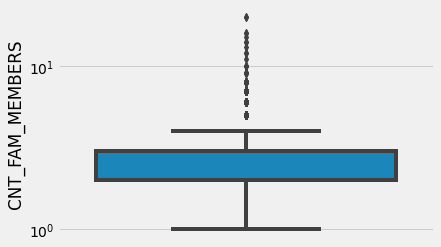

In [79]:
#ploting the data from CNT_FAM_MEMBERS coloumn in a box plot to detect outliners
sns.boxplot(y=df['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [80]:
print(f"Mean: {round(df['CNT_FAM_MEMBERS'].mean(),2)}",'\n')
print(f"Median: {df['CNT_FAM_MEMBERS'].median()}",'\n')
print(df['CNT_FAM_MEMBERS'].describe())

Mean: 2.15 

Median: 2.0 

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [81]:
df['CNT_FAM_MEMBERS'].isnull().sum()

2

#### Analysis of Code gender

In [82]:
df['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

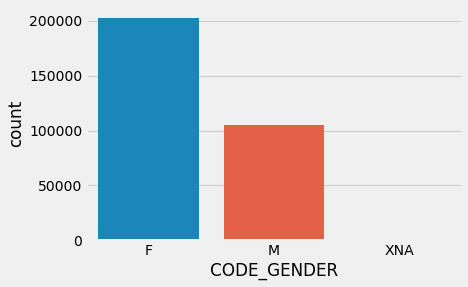

In [83]:
sns.countplot(x=df['CODE_GENDER'].sort_values())

In [84]:
# Replace XNA with mode
df.loc[df['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'

In [85]:
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [86]:
df_ORGA = pd.DataFrame(df['ORGANIZATION_TYPE'].value_counts()).reset_index()
df_ORGA.columns = ['ORGANIZATION_TYPE', 'Values']
print(df_ORGA)

         ORGANIZATION_TYPE  Values
0   Business Entity Type 3   67992
1                      XNA   55374
2            Self-employed   38412
3                    Other   16683
4                 Medicine   11193
5   Business Entity Type 2   10553
6               Government   10404
7                   School    8893
8            Trade: type 7    7831
9             Kindergarten    6880
10            Construction    6721
11  Business Entity Type 1    5984
12       Transport: type 4    5398
13           Trade: type 3    3492
14        Industry: type 9    3368
15        Industry: type 3    3278
16                Security    3247
17                 Housing    2958
18       Industry: type 11    2704
19                Military    2634
20                    Bank    2507
21             Agriculture    2454
22                  Police    2341
23       Transport: type 2    2204
24                  Postal    2157
25     Security Ministries    1974
26           Trade: type 2    1900
27              Rest

In [87]:
print(f"Mode: {df['ORGANIZATION_TYPE'].mode()}",'\n')
print(df['ORGANIZATION_TYPE'].describe())

Mode: 0    Business Entity Type 3
dtype: object 

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


In [88]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False)

100K-200K    155898
200k-300k     65176
0-100K        63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
NaN             232
700k-800k       162
900k-1M          28
1M Above         18
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL_RANGE', ylabel='count'>

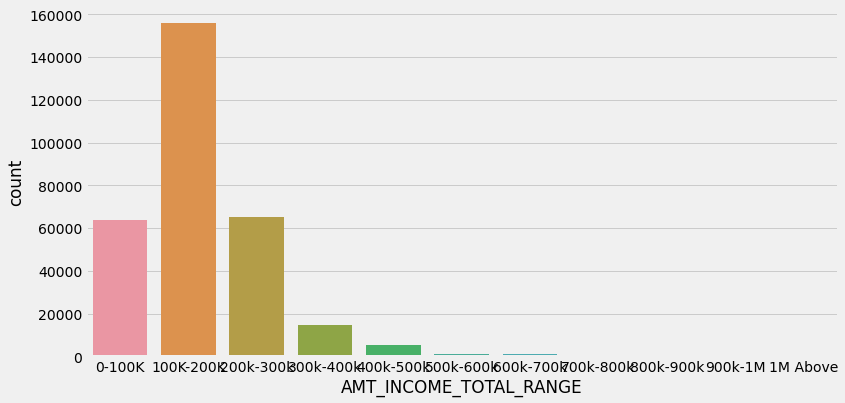

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['AMT_INCOME_TOTAL_RANGE'] )

In [90]:
df.loc[df['AMT_INCOME_TOTAL_RANGE']=='NaN', 'AMT_INCOME_TOTAL_RANGE'] = '100K-200K'

<AxesSubplot:>

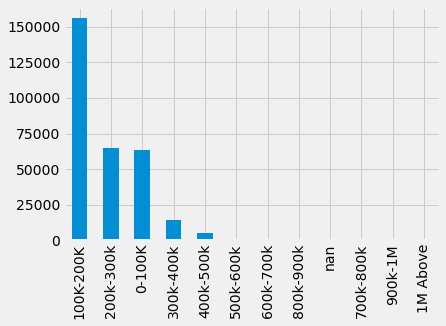

In [91]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False).plot(kind='bar')

In [92]:
df['AMT_INCOME_TOTAL_RANGE'].fillna(value = df['AMT_INCOME_TOTAL_RANGE'].mode(), inplace=True)

In [93]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_INCOME_TOTAL_RANGE           0.075444
AMT_GOODS_PRICE                  0.090403
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_CREDIT_RANGE                11.889981
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49

In [94]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False)

100K-200K    155898
200k-300k     65176
0-100K        63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
NaN             232
700k-800k       162
900k-1M          28
1M Above         18
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

#### Analysis of AMT_GOODS_PRICE

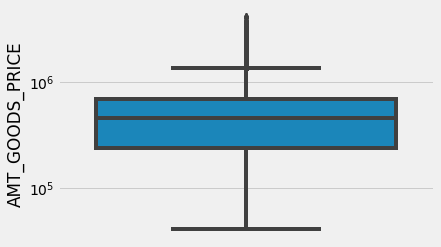

In [95]:
#box plotting the values of AMT_GOODS_PRICE

sns.boxplot(y=df['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()

In [96]:
print(f"Median: {df['AMT_GOODS_PRICE'].median()}\n")
print(f"Mean: {df['AMT_GOODS_PRICE'].mean()}\n")
print(f"Max: {df['AMT_GOODS_PRICE'].max()}\n")
print(f"Min: {df['AMT_GOODS_PRICE'].min()}\n")
print(df['AMT_GOODS_PRICE'].describe())

Median: 450000.0

Mean: 538396.2074288895

Max: 4050000.0

Min: 40500.0

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [97]:
df['AMT_GOODS_PRICE'].value_counts(dropna=False)

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1003, dtype: int64

In [98]:
df['AMT_GOODS_PRICE'].fillna(value = df['AMT_GOODS_PRICE'].median(), inplace=True)

In [99]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_INCOME_TOTAL_RANGE           0.075444
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_CREDIT_RANGE                11.889981
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49

In [100]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False)

100K-200K    155898
200k-300k     65176
0-100K        63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
NaN             232
700k-800k       162
900k-1M          28
1M Above         18
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [101]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  int64   
 2   NAME_CONTRACT_TYPE            307511 non-null  object  
 3   CODE_GENDER                   307511 non-null  object  
 4   FLAG_OWN_CAR                  307511 non-null  object  
 5   FLAG_OWN_REALTY               307511 non-null  object  
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_CREDIT                    307511 non-null  float64 
 8   AMT_ANNUITY                   307511 non-null  float64 
 9   AMT_GOODS_PRICE               307511 non-null  float64 
 10  NAME_TYPE_SUITE               306219 non-null  object  
 11  NAME_INCOME_TYPE              307511 non-null  object  
 12  NAME_EDUCATION_TYPE           

In [102]:
df=df.astype({'AMT_INCOME_TOTAL_RANGE': object, 'AMT_CREDIT_RANGE': object})

####  Analysis of AMT_REQ_CREDIT_BUREAU_DAY and Outlier detection

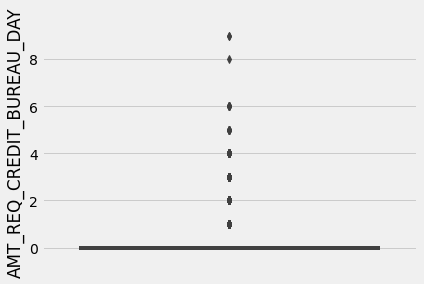

In [103]:
sns.boxplot(y=df['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [104]:
print(df['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [105]:
##----Removing outliers for the column below----##
cols_of_outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for i in cols_of_outliers:
    percentiles = df[i].quantile([0.01 ,0.99]).values
    df.loc[df[i] <= percentiles[0]] = percentiles[0]
    df.loc[df[i] >= percentiles[1]] = percentiles[1]

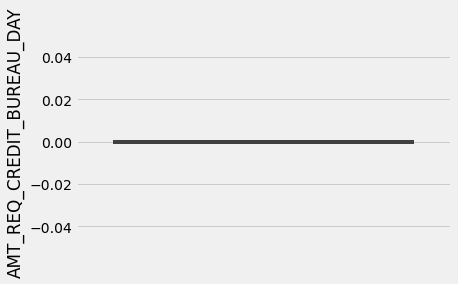

In [106]:
sns.boxplot(y=df['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [107]:
df_miss.index

Index(['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_RANGE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NAME_TYPE_SUITE', 'AMT_CREDIT_RANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE',
       'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG'],
      dtype='object')

#### change the positiv to negativ sign of 'DAYS_LAST_PHONE_CHANGE'

In [108]:
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])

In [109]:
df['DAYS_LAST_PHONE_CHANGE']

0           0.0
1           0.0
2           0.0
3         617.0
4           0.0
          ...  
307506    273.0
307507      0.0
307508      0.0
307509      0.0
307510      0.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

#### Columns 'CNT_FAM_MEMBERS'

In [110]:
df[ 'CNT_FAM_MEMBERS'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  5.,  6., nan,  7.,  9.,  8., 12.])

In [111]:
df[ 'CNT_FAM_MEMBERS'].mode()

0    0.0
dtype: float64

In [112]:
df[ 'CNT_FAM_MEMBERS'] = df[ 'CNT_FAM_MEMBERS'].replace('nan', '0.0')

In [113]:
df['CNT_FAM_MEMBERS'].value_counts(dropna=False).plot

In [114]:
# Drop the row with nan, beacuse it ios just one Row
df = df.dropna(subset=['CNT_FAM_MEMBERS'])

<AxesSubplot:>

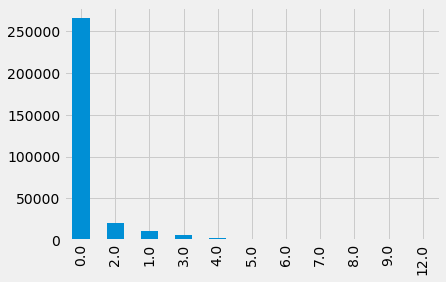

In [115]:
df['CNT_FAM_MEMBERS'].value_counts(dropna=False).plot(kind='bar')

#### Columns 'AMT_INCOME_TOTAL_RANGE'

<AxesSubplot:>

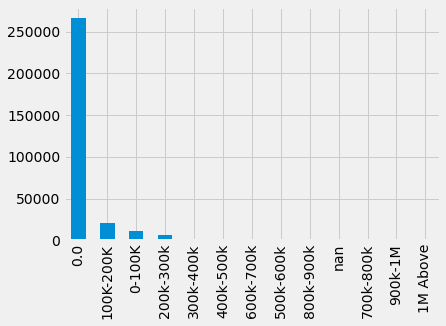

In [116]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False).plot(kind='bar')

In [117]:
df['AMT_INCOME_TOTAL_RANGE'].value_counts(dropna=False)

0.0          265992
100K-200K     20998
0-100K        11464
200k-300k      6943
300k-400k      1352
400k-500k       485
600k-700k       107
500k-600k        83
800k-900k        42
NaN              37
700k-800k         4
900k-1M           2
1M Above          1
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [118]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

for x in amount:
    df.loc[: ,x].fillna(df[x].median(), inplace=True)

In [119]:
df = df.drop(amount, axis=1)

In [120]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE          0.000325
AMT_INCOME_TOTAL_RANGE          0.012032
NAME_TYPE_SUITE                 0.035121
DEF_60_CNT_SOCIAL_CIRCLE        0.055283
OBS_60_CNT_SOCIAL_CIRCLE        0.055283
DEF_30_CNT_SOCIAL_CIRCLE        0.055283
OBS_30_CNT_SOCIAL_CIRCLE        0.055283
AMT_CREDIT_RANGE                1.299470
OCCUPATION_TYPE                 4.299698
EMERGENCYSTATE_MODE             6.869370
TOTALAREA_MODE                  6.989691
YEARS_BEGINEXPLUATATION_MODE    7.054080
YEARS_BEGINEXPLUATATION_AVG     7.054080
YEARS_BEGINEXPLUATATION_MEDI    7.054080
FLOORSMAX_MEDI                  7.192937
FLOORSMAX_MODE                  7.192937
FLOORSMAX_AVG                   7.192937
dtype: float64


In [121]:
floors = ['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG']

for x in floors:
    df.loc[: ,x].fillna(df[x].mean(), inplace = True)

In [122]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE          0.000325
AMT_INCOME_TOTAL_RANGE          0.012032
NAME_TYPE_SUITE                 0.035121
DEF_30_CNT_SOCIAL_CIRCLE        0.055283
DEF_60_CNT_SOCIAL_CIRCLE        0.055283
OBS_60_CNT_SOCIAL_CIRCLE        0.055283
OBS_30_CNT_SOCIAL_CIRCLE        0.055283
AMT_CREDIT_RANGE                1.299470
OCCUPATION_TYPE                 4.299698
EMERGENCYSTATE_MODE             6.869370
TOTALAREA_MODE                  6.989691
YEARS_BEGINEXPLUATATION_MEDI    7.054080
YEARS_BEGINEXPLUATATION_MODE    7.054080
YEARS_BEGINEXPLUATATION_AVG     7.054080
dtype: float64


In [123]:
years = ['YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG']

for x in years:
    df.loc[: ,x].fillna(df[x].mean(), inplace = True)

In [124]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE      0.000325
AMT_INCOME_TOTAL_RANGE      0.012032
NAME_TYPE_SUITE             0.035121
OBS_60_CNT_SOCIAL_CIRCLE    0.055283
OBS_30_CNT_SOCIAL_CIRCLE    0.055283
DEF_30_CNT_SOCIAL_CIRCLE    0.055283
DEF_60_CNT_SOCIAL_CIRCLE    0.055283
AMT_CREDIT_RANGE            1.299470
OCCUPATION_TYPE             4.299698
EMERGENCYSTATE_MODE         6.869370
TOTALAREA_MODE              6.989691
dtype: float64


In [125]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

0.0                      265992
NaN                       13222
Laborers                   7788
Sales staff                5197
Core staff                 3177
Drivers                    2628
Managers                   2182
High skill tech staff      1352
Accountants                1047
Security staff             1012
Cooking staff               848
Medicine staff              827
Cleaning staff              691
Low-skill Laborers          476
Private service staff       424
Waiters/barmen staff        241
Secretaries                 161
Realty agents               121
IT staff                     64
HR staff                     60
Name: OCCUPATION_TYPE, dtype: int64

In [126]:
description_func(row='OCCUPATION_TYPE')

What kind of occupation does the client have


In [127]:
# Replace the mode '0.0' with 'unemployed' and also 'NaN' with mode 'unemployed'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace({0.0: 'unemployed', np.NaN: 'unemployed'})

In [128]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

unemployed               279214
Laborers                   7788
Sales staff                5197
Core staff                 3177
Drivers                    2628
Managers                   2182
High skill tech staff      1352
Accountants                1047
Security staff             1012
Cooking staff               848
Medicine staff              827
Cleaning staff              691
Low-skill Laborers          476
Private service staff       424
Waiters/barmen staff        241
Secretaries                 161
Realty agents               121
IT staff                     64
HR staff                     60
Name: OCCUPATION_TYPE, dtype: int64

In [129]:
df_miss = find_missing_values(df)
print(df_miss)

DAYS_LAST_PHONE_CHANGE      0.000325
AMT_INCOME_TOTAL_RANGE      0.012032
NAME_TYPE_SUITE             0.035121
OBS_30_CNT_SOCIAL_CIRCLE    0.055283
DEF_30_CNT_SOCIAL_CIRCLE    0.055283
OBS_60_CNT_SOCIAL_CIRCLE    0.055283
DEF_60_CNT_SOCIAL_CIRCLE    0.055283
AMT_CREDIT_RANGE            1.299470
EMERGENCYSTATE_MODE         6.869370
TOTALAREA_MODE              6.989691
dtype: float64


#### Columns 'OBS_30_CNT_SOCIAL_CIRCLE'

In [130]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 0.,  2.,  4.,  1.,  3., 12.,  9.,  6.,  5., nan,  7., 10.,  8.,
       11., 14., 17., 13., 15., 20., 18., 16., 22., 23., 21., 19., 25.,
       24.])

In [131]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(dropna=False)

0.0     288830
1.0       6340
2.0       3981
3.0       2585
4.0       1841
5.0       1206
6.0        819
7.0        553
8.0        389
9.0        252
10.0       182
NaN        170
11.0       113
12.0        84
13.0        56
14.0        29
15.0        24
16.0        15
17.0        12
20.0         8
18.0         6
23.0         5
21.0         3
22.0         2
19.0         2
25.0         2
24.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [132]:
description_func(row='OBS_30_CNT_SOCIAL_CIRCLE')

How many observation of client's social surroundings with observable 30 DPD (days past due) default


In [133]:
description_func(row='OBS_60_CNT_SOCIAL_CIRCLE')

How many observation of client's social surroundings with observable 60 DPD (days past due) default


In [134]:
col_mixt = ['OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE',
      'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE','AMT_INCOME_TOTAL_RANGE','NAME_TYPE_SUITE','AMT_CREDIT_RANGE'
            ,'EMERGENCYSTATE_MODE','TOTALAREA_MODE']

for x in col_mixt:
    df.loc[:, x] = df[x].replace(to_replace = np.NaN, value='0.0')

In [135]:
df_miss = find_missing_values(df)
print(df_miss)

Series([], dtype: float64)


<AxesSubplot:>

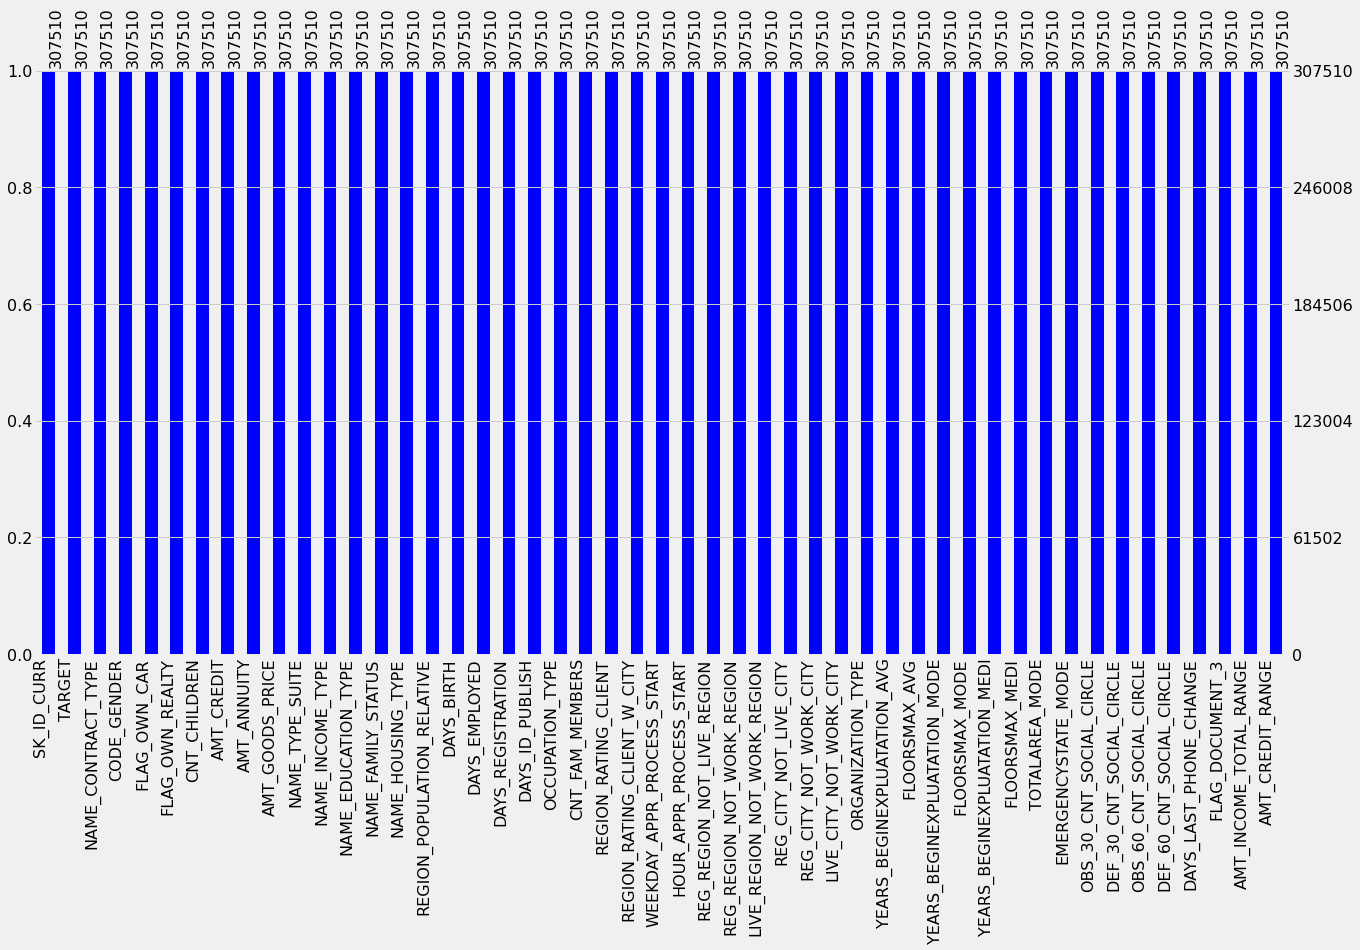

In [137]:
msno.bar(df, label_rotation=90, figsize=(20,10), color='blue')